In [1]:
import igraph as ig
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from itertools import zip_longest
from itertools import islice
from tqdm import tqdm
import os
from random import sample

In [2]:
## Matplotlib defaults ##
colors = {"1980": "#aa0f35", 
         "1985": "#fdc799",
         "1990": "#abdbfc",
         "1995": "#a0a75c",
         "2000": "#603734",
         "2005": "#009ecb",
         "2010": "#430057",
         "2015": "#f89b00"}

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rcParams.update({'font.size': 22})

# Preferential Attachment Graphing

Goal = graph preferential attachment for all 5-year increments from 1980 to 2019

In [3]:
start = 1980
end = 2005

pairs = [(1980, 1984), (1985, 1989), (1990, 1994), (1995, 1999), (2000, 2004), (2005, 2009), (2010,2014), (2015, 2019)]

In [4]:
def plot_best_fit(start, stop):
    #Read in pickled files - from Cronin relative file path
    full_id_degrees = pickle.load(file=open("Data/Degrees/full_id_degrees_" + str(start) + "_" + str(stop) + ".p", "rb"))
    pref_attach_dict = pickle.load(file=open("Data/pref_attach_dict_" + str(start) + "_" + str(stop) + ".p", "rb"))

    #Read in pickled files - from cronin file path
    # full_id_degrees = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/full_id_degrees_1980_1989.p", "rb"))
    # pref_attach_dict = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/pref_attach_dict_1980_1989.p", "rb"))

    #Create two list of initial degrees
    initial_degrees = []
    for key, value in full_id_degrees.items():
        initial_degrees.append(value[0])
    

    plt.scatter(x=initial_degrees, y=list(pref_attach_dict.values()), color=colors[str(start)], alpha=0.2)
    
    #Fit line of best fit
    m,b = np.polyfit(initial_degrees, list(pref_attach_dict.values()), 1)
    
    plt.plot(np.arange(0,max(initial_degrees),1), m*np.arange(0,max(initial_degrees),1) + b, label=str(start) + " - " + str(stop)
             , color=colors[str(start)])
    

In [5]:
# Best fit lines only (& normalized)

plt.figure(figsize=(8,8))

for pair in [[2015, 2019]]:
    plot_best_fit(pair[0], pair[1])
    
plt.xlabel("Initial Degree")
plt.ylabel("Preferential Attachment Index")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.title("2015 To 2019")
# plt.xlim([0,1000])
# plt.ylim([0,1000])

plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Degrees/full_id_degrees_2015_2019.p'

<Figure size 576x576 with 0 Axes>

In [6]:
mb_pairs = [[0.9775505820281024,3.6911788708586846],
  [0.8585131147329826,4.217353519055628],
  [1.0897414910508383,4.6551801537076605],
  [1.0291041384269501,5.702995243832083],
  [1.5637915240218274,18.08341830551379],
  [1.12369714513705,15.94782609638979],
    [1.1358915457365812,7.702558377590308],
    [1.1986916622559294,6.89683552196379]]

Text(0, 0.5, 'Avg Preferential Attachement Index, Normalized')

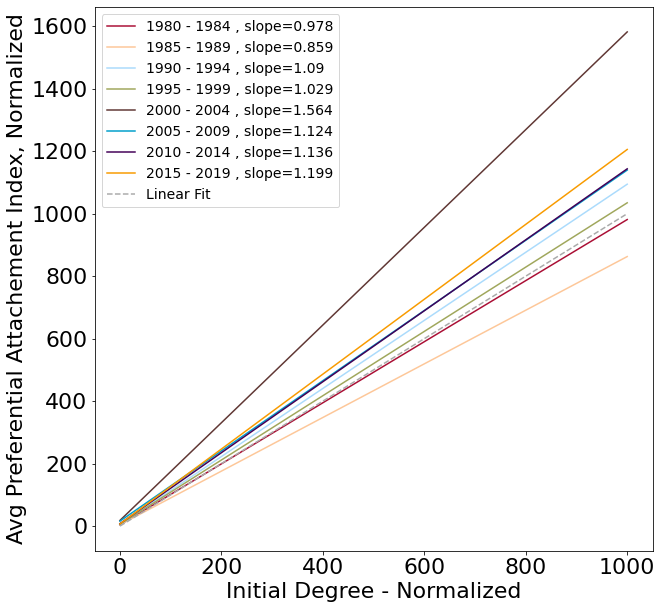

In [7]:
plt.figure(figsize=(10,10))
count = 0

for pair in mb_pairs:
    start, stop = pairs[count]
    plt.plot(np.arange(0,1001,1), pair[0]*np.arange(0,1001,1) + pair[1], 
             label=str(start) + " - " + str(stop) + " , slope=" + str(round(pair[0],3)),
            color=colors[str(start)])
    count += 1
    
#Linear Fit
plt.plot(np.arange(0,1001,1), np.arange(0,1001,1), "--", label="Linear Fit", color="#aaaaaa")
plt.legend(prop={"size":14})
plt.xlabel("Initial Degree - Normalized")
plt.ylabel("Avg Preferential Attachement Index, Normalized", fontsize=22)

In [4]:
def find_best_fit_scatter(start, stop, colors):
    #Read in pickled files - from Cronin relative file path
    full_id_degrees = pickle.load(file=open("Data/Degrees/full_id_degrees_" + str(start) + "_" + str(stop) + ".p", "rb"))
    pref_attach_dict = pickle.load(file=open("Data/PrefAttachment/pref_attach_dict_" + str(start) + "_" + str(stop) + ".p", "rb"))
    
    #Read in pickled files - from cronin file path
    # full_id_degrees = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/full_id_degrees_1980_1989.p", "rb"))
    # pref_attach_dict = pickle.load(file=open("Z:/group/John Malloy/Projects/Patents/Data/pref_attach_dict_1980_1989.p", "rb"))

    #Create two list of initial degrees
    initial_degrees = []
    for key, value in full_id_degrees.items():
      initial_degrees.append(value[0])

    #Fit line of best fit
    m,b = np.polyfit(initial_degrees, list(pref_attach_dict.values()), 1)
    print(m,b)
    initial_degrees = np.array(initial_degrees)

    plt.plot(np.arange(0,400000,1), m*np.arange(0,400000,1) + b, label=str(start) + " - " + str(stop),
            color=colors[str(start)])
    plt.scatter(x=initial_degrees, y=pref_attach_dict.values(), alpha=0.2, color=colors[str(start)])

0.9775505820281019 3.691178870858767
0.8585131147329808 4.21735351905517
1.0897414910508398 4.655180153707552


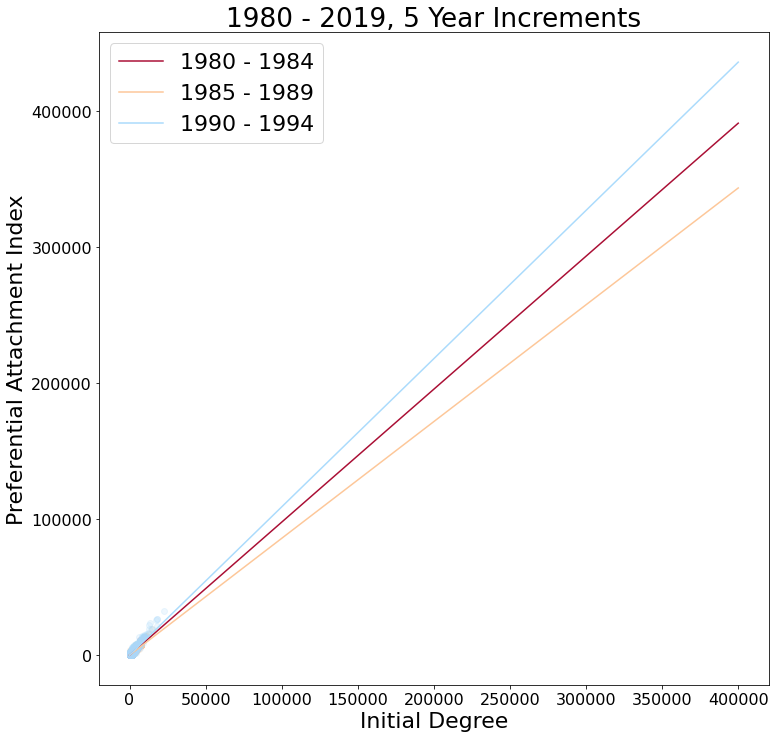

In [5]:
# Best fit lines only (& normalized)

plt.figure(figsize=(12,12))

for pair in pairs[0:3]:
    find_best_fit_scatter(pair[0], pair[1], colors)
    
plt.xlabel("Initial Degree")
plt.ylabel("Preferential Attachment Index")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("1980 - 2019, 5 Year Increments")
plt.legend()
# plt.xlim([0,1000])
# plt.ylim([0,1000])

plt.show()